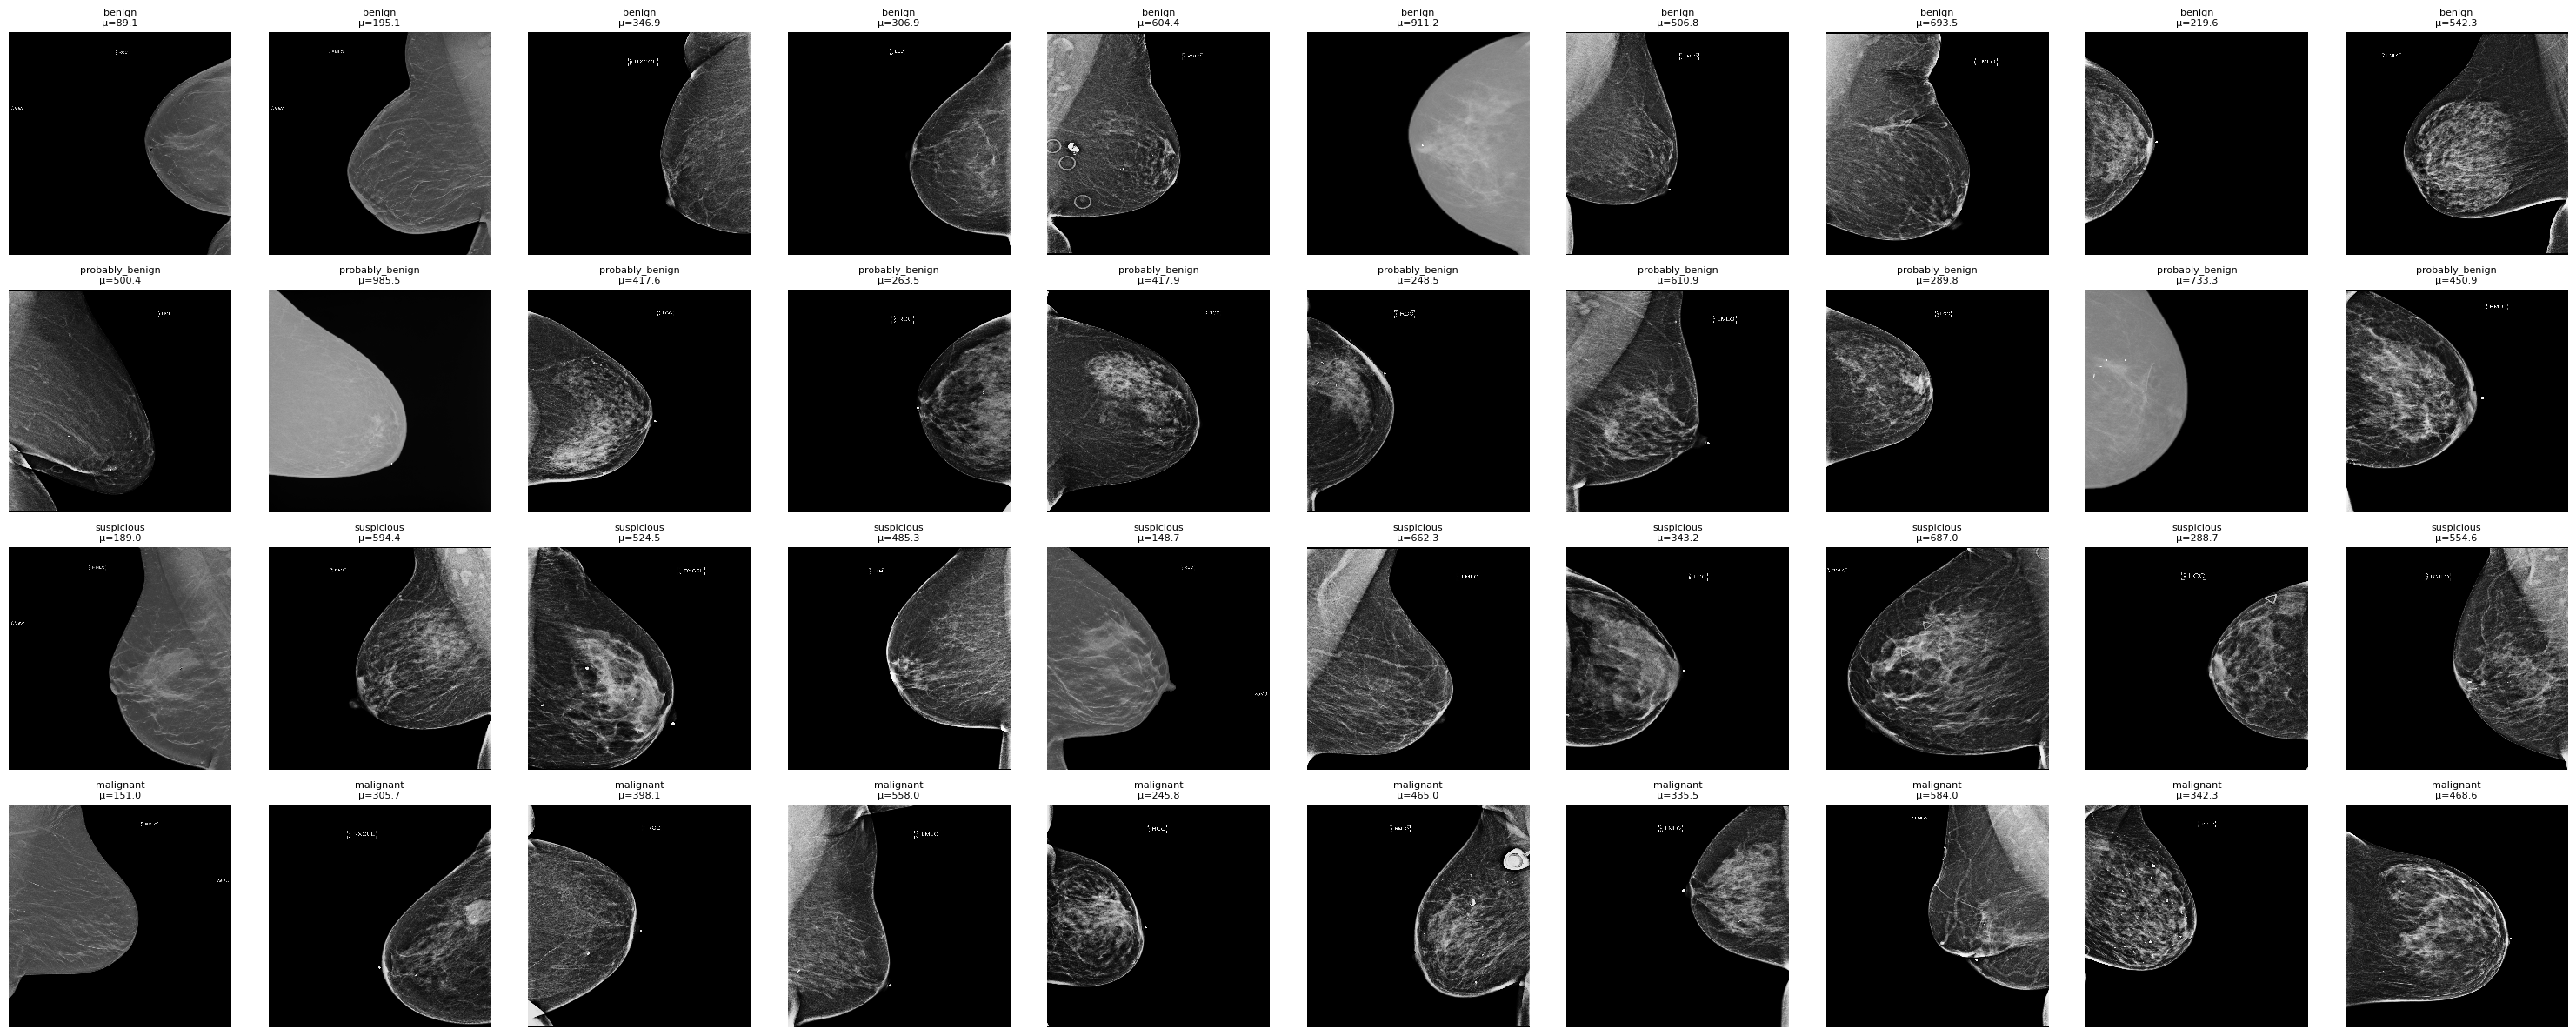

In [7]:
import random, os, nibabel as nib
import matplotlib.pyplot as plt
import numpy as np

# ------------------------------------------------------------------
# 0.  Set Seed for Reproducibility
# ------------------------------------------------------------------
random.seed(2024)
# ------------------------------------------------------------------
# 1.  Parameters
# ------------------------------------------------------------------
output_dir = "/mnt/d/Datasets/EMBED/EMBED_clean_256x256"
split      = "train"                            # or "test"
categories = ["benign", "probably_benign", "suspicious", "malignant"]
n_samples  = 10                                 # how many per category

# ------------------------------------------------------------------
# 2.  Helper: grab up to n_samples slice paths for one category
# ------------------------------------------------------------------
def sample_paths(cat, k):
    class_dir   = os.path.join(output_dir, split, "original", cat)   # ← remove “original” if not needed
    subdirs     = [os.path.join(class_dir, d) for d in os.listdir(class_dir)]
    nifti_files = [os.path.join(d, "slice.nii.gz") for d in subdirs]
    k = min(k, len(nifti_files))
    return random.sample(nifti_files, k) if k else []

sampled = {c: sample_paths(c, n_samples) for c in categories}

# ------------------------------------------------------------------
# 3.  Plot grid  (rows = categories, cols = samples)
# ------------------------------------------------------------------
fig_w = 3          # inches per thumbs
fig_h = 3
fig, axes = plt.subplots(
    nrows=len(categories),
    ncols=n_samples,
    figsize=(fig_w * n_samples, fig_h * len(categories)),
    squeeze=False
)

for row, cat in enumerate(categories):
    for col in range(n_samples):
        ax = axes[row, col]
        try:
            path = sampled[cat][col]
            img  = nib.load(path).get_fdata()[:, :, 0]
            ax.imshow(img, cmap="gray")
            stats = img.shape[0], np.mean(img).round(1)
            title = f"{cat}\nμ={stats[1]}"
        except IndexError:          # fewer than n_samples available
            ax.imshow(np.zeros((512,512)), cmap="gray")  # blank
            title = f"{cat}\n(no image)"
        ax.set_title(title, fontsize=8)
        ax.axis("off")

plt.tight_layout()
plt.show()


In [ ]:
# ------------------------------------------------------------------
# 4.  Count cases per category (one folder = one case)
# ------------------------------------------------------------------
def count_cases(cat, split):
    class_dir = os.path.join(output_dir, split, cat)
    # keep only sub‑directories (skip stray files, .DS_Store, etc.)
    return sum(os.path.isdir(os.path.join(class_dir, d)) for d in os.listdir(class_dir))

case_counts_train = {cat: count_cases(cat, "train/original") for cat in categories}
case_counts_test = {cat: count_cases(cat, "test") for cat in categories}

print("Case counts per category:")
for cat in categories:
    print(f"Train  {cat:17}: {case_counts_train[cat]:>6}")
    print(f"Test  {cat:17}: {case_counts_test[cat]:>6}")
